# <center> Programming for Artificial Intelligence and Data Science
## <center> Coursework 2

# <center> K-Means Clustering

## <u> Table of Content :

0. [<b>Introduction</b>](#part0)
    1. [Libraries](#part01)
    2. [Datasets and Variables](#part02)
       - NBA Dataset 
       - Simple Dataset
       - Iris Dataset
    3. [Glossary](#part03)
1. [<b>Task 1: Prepare two test datasets</b>](#part1)
    1. [NBA Dataset](#part11)
    2. [Simple Dataset](#part12)
    3. [Iris Dataset](#part13)
2. [<b>Task 2: Apply k-means clustering on paper</b>](#part2)
    1. [NBA Dataset](#part21)
    2. [Sanity Check and Visualisation](#part22)
    3. [Simple Dataset](#part23)
    4. [Sanity Check and Visualisation](#part24) 
3. [<b>Create a test harness</b>](#part3)
    1. [Change in the Price of Flats](#part31)
    2. [Visualisations of the Percent Change in Flats Properties Prices ](#part32)
    3. [Discussion](#part33)
4. [<b>Task 4: Implement k-means clustering in Python</b>](#part4)
    1. [Cross-Tabulation](#part41)
    2. [Chi-Square Test](#part42)
    3. [Interpretation](#part43)
5. [<b>Task 5 (Optional): Add a visualisation</b>](#part5)


#  <b> Introduction</b> <a name="part0"></a>
> ## <b> A. Libraries <a name="part01"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Iris Dataset
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')
from sklearn.datasets import load_iris
import csv

#Used as Sanity Check for task 2.
from sklearn.cluster import KMeans

#Used to compute the time calculation for task 4.
import time

#Used in task 4 for the K_Mean class created
from collections import defaultdict

> ##  <b> B. Datasets and Variables <a name="part02"></a>
### NBA Dataset

I decided to use NBA data sets because it is the greatest sport for gathering data, everything is recorded and accessible and I'm really passionate about the NBA and especially the analysis of its data. . Moreover, I think that my project is relevant because it fulfils the requested exercise. Furthermore, the selected data is perfectly suited for the realisation of the K-Mean Clustering mechanism.

In this project, I decided to study and classify the 30 highest volume 3-point shooters in the NBA across different periods. The NBA since its inception has been in constant evolution and adjustment. The trend is governed by the players that constitute the league. In the early days of the NBA the 3-point line did not exist, it was only in 1979 that it was introduced. The 3-point shot, which provides more points, progressively became part of the players' habits until it became an indispensable and omnipresent characteristic in the current NBA.

The project, therefore, focuses on the evolution and classification of three-point shooters in the NBA during three distinct periods: 1980 (creation of the 3-point line), 2000 and 2020.

For this purpose, the data that has been extracted comes from the well known website https://www.basketball-reference.com/ which is a reference in terms of NBA statistics.

The 10 players for each period who made the most 3-point shots (3PA) were selected and then sorted alphabetically in order to understand the mechanism of K-Mean Clustering without having the players previously sorted by period or by 3-point volume. 

Here is the link to the (10) shooters with the highest volume at 3 points (3PA).

<u>for the year 1980</u>: https://www.basketball-reference.com/leagues/NBA_1980_per_game.html

<u>for the year 2000</u>: https://www.basketball-reference.com/leagues/NBA_2000_per_game.html

<u>for the year 2020</u>: https://www.basketball-reference.com/leagues/NBA_2020_per_game.html

Using the K-Mean Clustering mechanism, the objective is to successfully reclassify players in their respective periods according to their volume of attempted shots. Logically, the volume of 3-point shots has been increasing over time, so there will be a noticeable difference between the 3-point shooters of 1980, 2000 and 2020. It is for this reason that it seems to be interesting to apply the K-Mean Clustering method to this dataset whose players' names have been sorted in alphabetical order to exploit the K-Mean Clustering mechanism at best.

The file <b><u>NBA3PA.csv</b> has information about the per game: 3-Point field goals (3P), 3-Point field goal attempts (3PA) and 3-Point field goal percentage (3P%). There is 30 players listed in alphabetical order over different NBA eras that fits into three clusters. The dataset contains the following fields:

In [2]:
three_point= pd.read_csv("NBA3PA.csv", index_col="Player")
three_point

,Pos,Team,3P,3PA▼,3P%
Player,,,,,
Bradley Beal,SG,WAS,3.0,8.4,0.353
Brent Barry,SG,SEA,2.1,5.0,0.411
Brian Taylor,PG,SDC,1.2,3.1,0.377
Buddy Hield,SG,SAC,3.8,9.6,0.394
Chris Ford,SG,BOS,1.0,2.2,0.427
Damian Lillard,PG,POR,4.1,10.2,0.401
Darrell Armstrong,PG,ORL,1.7,4.9,0.340
Dāvis Bertāns,PF,WAS,3.7,8.7,0.424
Devonte' Graham,PG,CHO,3.5,9.3,0.373


### Simple Dataset

Performing the K-Mean Clustering using NBA statistics was a special concern for me. However, in order to respect the guidelines I also performed the K-Mean Clustering method using a small random set of values without real interpretation allowing a much more simplified approach of the problem.
This dataset emphasize the K-Mean Clustering mechanism, the data set is composed of 12 values that fits into four clusters.

In [3]:
values = np.array([[1, 2],
              [2, 2],
              [1, 3],
              [8, 2],
              [9, 3],
              [8, 3],
              [1, 7],
              [1, 9],
              [2, 8],
              [3, 9],
              [4, 4],
              [5, 5]])
values

array([[1, 2],
       [2, 2],
       [1, 3],
       [8, 2],
       [9, 3],
       [8, 3],
       [1, 7],
       [1, 9],
       [2, 8],
       [3, 9],
       [4, 4],
       [5, 5]])

### Iris Dataset

The iris data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray that fits into three clusters.
To read more about the iris dataset please remove the # in front of the line print(iris.DESCR)

In [4]:
iris = load_iris()
#print(iris.DESCR)

with open('iris.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(iris.feature_names)
    writer.writerows(iris.data.tolist())

> ## <b> C. Glossary <a name="part03"></a>

Pos = Position
 - PG = Point Guard
 - SG = Shooting Guard
 - SF = Small Forward
 - PF = Power Forward 
 
Team = Team

3P = 3-Point Field Goals Per Game

3PA = 3-Point Field Goal Attempts Per Game

3P% = 3-Point Field Goal Percentage

> #  <b> Task 1: Prepare two test datasets <a name="part1"></a>

## <b> A. NBA Dataset <a name="part11"></a>

In [5]:
three_point_clustering = three_point[['3P', '3PA▼']].to_numpy()
three_point_clustering

array([[ 3. ,  8.4],
       [ 2.1,  5. ],
       [ 1.2,  3.1],
       [ 3.8,  9.6],
       [ 1. ,  2.2],
       [ 4.1, 10.2],
       [ 1.7,  4.9],
       [ 3.7,  8.7],
       [ 3.5,  9.3],
       [ 3.7,  8.3],
       [ 1.8,  4.7],
       [ 0.5,  1.6],
       [ 2.2,  6.3],
       [ 0.4,  1.3],
       [ 4.4, 12.4],
       [ 1.8,  6.2],
       [ 0.9,  2.7],
       [ 0.6,  1.6],
       [ 3.2,  8.4],
       [ 0.7,  1.7],
       [ 2. ,  4.7],
       [ 2.8,  8.9],
       [ 0.3,  1.3],
       [ 0.6,  1.9],
       [ 1.8,  5.5],
       [ 1.7,  5.1],
       [ 2.1,  5. ],
       [ 2. ,  5. ],
       [ 1. ,  3.1],
       [ 3.4,  9.5]])

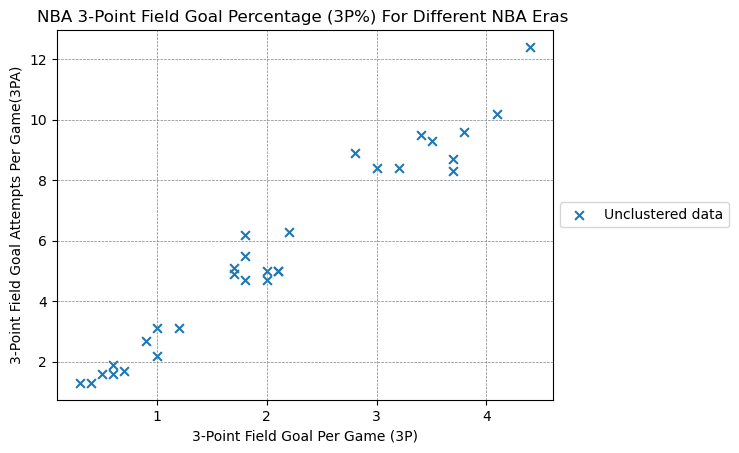

In [6]:
plt.scatter(three_point_clustering[:,0], three_point_clustering[:,1], s = 40, marker = 'x', label = 'Unclustered data')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlabel('3-Point Field Goal Per Game (3P)')
plt.ylabel('3-Point Field Goal Attempts Per Game(3PA)')
plt.title('NBA 3-Point Field Goal Percentage (3P%) For Different NBA Eras ')
plt.show()

From the visualization above, we can see that the optimal number of clusters should be about **3**. But the visualisation of the data alone may not always give the right answer.

The elbow method is a method for determining the number of clusters, which consists of calculating the variance of the different volumes of clusters envisaged, and then placing the variances obtained on a graph. The result is an elbow-shaped visualisation in which the optimal number of clusters is the point representing the tip of the elbow, i.e. the point corresponding to the number of clusters from which the variance does not decrease significantly.

In [7]:
def RangeK(clustering):
    if len(clustering) < 35:
        return len(clustering)
    else:
        return 35

def ElbowMethod(clustering):
    distortions = []
    K = range(1, RangeK(clustering))
    for k in K:
        kmeans2 = KMeans(n_clusters = k)
        kmeans2.fit(clustering)
        distortions.append(kmeans2.inertia_)
    
    plt.figure(figsize=(10,10))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

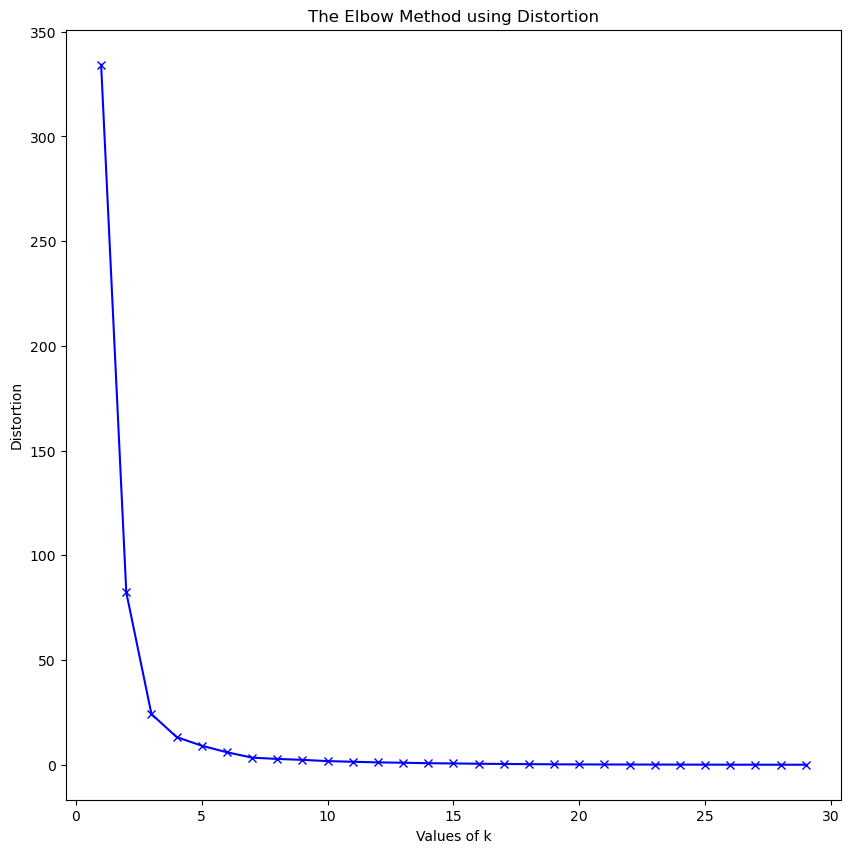

In [8]:
ElbowMethod(three_point_clustering)

The ideal value of k for the NBA dataset seems to be 3 thus involving 3 clusters.

##  <b> B. Simple Dataset <a name="part12"></a>

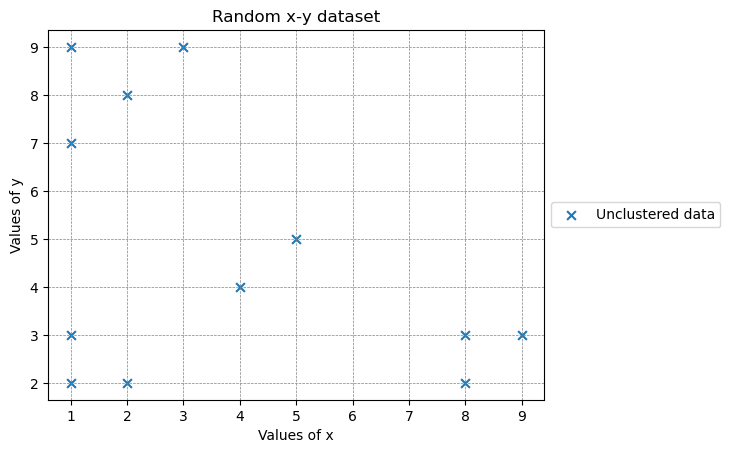

In [9]:
plt.scatter(values[:,0], values[:,1], s = 40, marker = 'x', label = 'Unclustered data')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlabel('Values of x')
plt.ylabel('Values of y')
plt.title('Random x-y dataset')
plt.show()

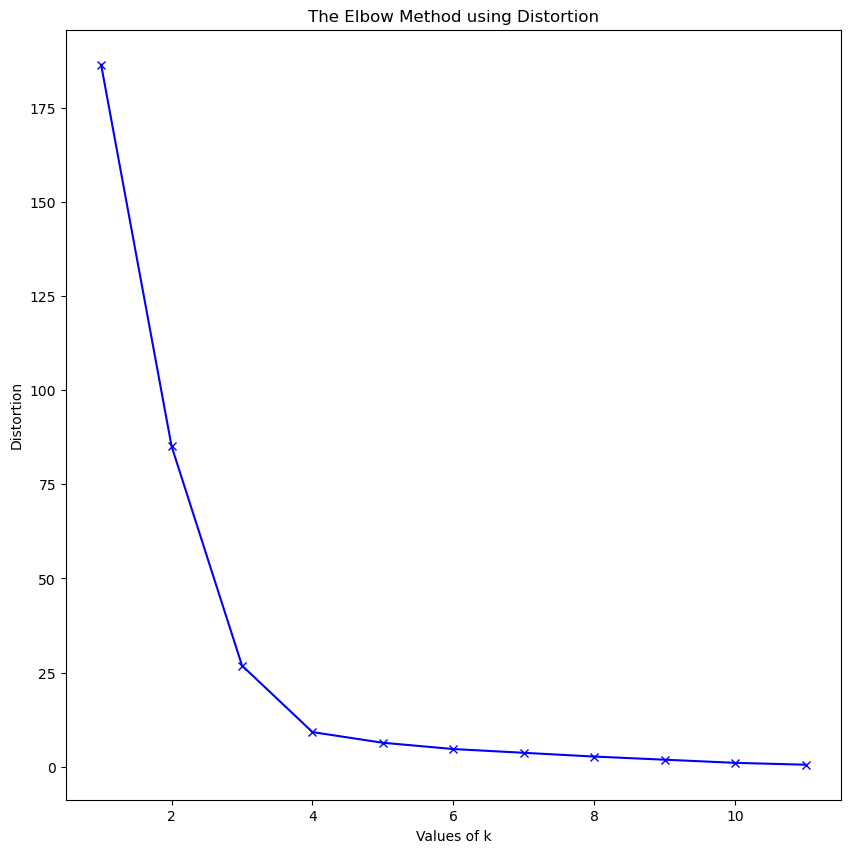

In [10]:
ElbowMethod(values)

From this plot, the ideal value of k for the simple dataset seems to be 4 thus involving 4 clusters.

##  <b> C. Iris Dataset <a name="part13"></a>
From the Iris dataset we can figure out 3 different classes:
>Iris-Setosa

>Iris-Versicolour

>Iris-Virginica

Thus, it is interesting to take 3 centroïds (K = 3)

In [11]:
X = pd.DataFrame(iris.data,columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target,columns=['Classes'])
X.shape

(150, 4)

In [12]:
X['species'] = pd.Series(np.random.randn(150), index=X.index)
X['species'][y['Classes']==0]='Setosa'
X['species'][y['Classes']==1]='versicolor'
X['species'][y['Classes']==2]='virginica'
X

,Sepal Length,Sepal Width,Petal Length,Petal Width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

> # Task 2: Apply k-means clustering on paper <a name="part2"></a>

In this part, the purpose is to apply the K-Mean Clustering method on the two datasets (NBA and simple) created in part 1. All the steps to perform the K-Mean Clustering will be detailed using the markdown option. At the end, using the KMean library, we will be able to see if we have found consistent results for both datasets.

<u><b> Step 0: Initialization:</b></u>

We randomly associate 3 centroids.

<u><b> Step 1:</b></u>

Using the "classical" method based on the Euclidean distance, we calculate the distance between the values and each centroid

<u><b>Step 2:

Each value is assigned to the nearest centroid.

<u><b>Step 3:

The centres of gravity of the groups are then computed and become the new centroids

<u><b>Iterative loop:

Steps 1, 2 and 3 are repeated as long as values are reassigned to new groups after one iteration.

> ## <b>A. NBA Dataset <a name="part21"></a>
### <u><b> Step 0: Initialization:</b></u>

First of all, it is important to choose a number "k" of centroids. In this example, k = 3 (according to the Elbow Method).  This represents the three-point shooting trend over time.
The initial centroids thus have their values randomly associated within a range of values included in our dataset. Thus, the Centroid 1 will take the values (1,2), Centroid 2 (3,6) and Centroid 3 (1,10).

### <u><b> Step 1 and 2:</b></u>

The Euclidean distance e is given by
$$
e\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|=\sqrt{\sum_{j=1}^d\left(x_j-x_j^{\prime}\right)^2}
$$

After calculating the distance between the value and each centroid using the euclidean distance (Step 1). It is necessary to find the nearest values to these centroids (Step 2)

<pre>                Three Points Statistics          Euclidean Distance Calculation</pre>
|**Player**                |**3P**   |**3PA**  | **Centroid 1 (1, 2)** | **Centroid 2 (3, 6)** | **Centroid 3 (1, 10)**  | **Nearest Cluster** |
| :---:                 | :---:| :---:| :---: | :---: | :---: | :---:|
|Bradley Beal          | 3.0 | 8.4 | 6.7 | 2.4 | 2.6 | 2   |
|Brent Barry           | 2.1 | 5.0 | 3.2 | 1.4 | 5.1 | 2   |
|Brian Taylor          | 1.2 | 3.1 | 1.1 | 3.4 | 6.9 | 1   |
|Buddy Hield           | 3.8 | 9.6 | 8.1 | 3.7 | 2.8 | 3   |
|Chris Ford            | 1.0 | 2.2 | 0.2 | 4.3 | 7.8 | 1   |
|Damian Lillard        | 4.1 | 10.2| 8.8 | 4.3 | 3.1 | 3   |
|Darrell Armstrong     | 1.7 | 4.9 | 3.0 | 1.7 | 5.1 | 2   |
|Dāvis Bertāns         | 3.7 | 8.7 | 7.2 | 2.8 | 3.0 | 2   |
|Devonte' Graham       | 3.5 | 9.3 | 7.7 | 3.3 | 2.6 | 3   |
|Duncan Robinson       | 3.7 | 8.3 | 6.9 | 2.4 | 3.2 | 2   |
|Eddie Jones           | 1.8 | 4.7 | 2.8 | 1.8 | 5.4 | 2   |
|Freeman Williams      | 0.5 | 1.6 | 0.6 | 5.1 | 8.4 | 1   |
|Gary Payton           | 2.2 | 6.3 | 4.5 | 0.9 | 3.9 | 2   |
|George Gervin         | 0.4 | 1.3 | 0.9 | 5.4 | 8.7 | 1   |
|James Harden          | 4.4 | 12.4| 10.9| 6.6 | 4.2 | 3   |
|Jason Williams        | 1.8 | 6.2 | 4.3 | 1.2 | 3.9 | 2   |
|Joe Hassett           | 0.9 | 2.7 | 0.7 | 3.9 | 7.3 | 1   |
|John Roche            | 0.6 | 1.6 | 0.6 | 5.0 | 8.4 | 1   |
|Kemba Walker          | 3.2 | 8.4 | 6.8 | 2.4 | 2.7 | 2   |
|Larry Bird            | 0.7 | 1.7 | 0.4 | 4.9 | 8.3 | 1   |
|Lindsey Hunter        | 2.0 | 4.7 | 2.9 | 1.6 | 5.4 | 2   |
|Luka Dončić           | 2.8 | 8.9 | 7.1 | 2.9 | 2.1 | 3   |
|Micheal Ray Richardson| 0.3 | 1.3 | 1.0 | 5.4 | 8.7 | 1   |
|Mike Newlin           | 0.6 | 1.9 | 0.4 | 4.8 | 8.1 | 1   |
|Nick Anderson         | 1.8 | 5.5 | 3.6 | 1.3 | 4.6 | 2   |
|Nick Van Exel         | 1.7 | 5.1 | 3.2 | 1.6 | 4.9 | 2   |
|Ray Allen             | 2.1 | 5.0 | 3.2 | 1.3 | 5.1 | 2   |
|Reggie Miller         | 2.0 | 5.0 | 3.2 | 1.4 | 5.1 | 2   |
|Rick Barry            | 1.0 | 3.1 | 1.1 | 3.5 | 6.9 | 1   |
|Trae Young            | 3.4 | 9.5 | 7.9 | 3.5 | 2.5 | 3   |

### <u><b>Step 3:

Cluster Centroid $K_1$ = ($\frac{1.2 + 1.0 + 0.5 + 0.4 + 0.9 + 0.6 + 0.7 + 0.3 + 0.6 + 1.0}{10}$, $\frac{3.1 + 2.2 + 1.6 + 1.3 + 2.7 + 1.6 + 1.7 + 1.3 + 1.9 + 3.1}{10}$) = (0.72, 2.05)

Cluster Centroid $K_2$  = ($\frac{3.0 + 2.1 + 1.7 + 3.7 + 3.7 + 1.8 + 2.2 + 1.8 + 3.2 + 2.0 + 1.8 + 1.7 + 2.1 + 2.0}{14}$, $\frac{8.4 + 5.0 + 4.9 + 8.7 + 8.3 + 4.7 + 6.3 + 6.2 + 8.4 + 4.7 + 5.5 + 5.1 + 5.0 + 5.0}{14}$) = (2.34, 6.16) 

Cluster Centroid $K_3$  = ($\frac{3.8 + 4.1 + 3.5 + 4.4 + 2.8 + 3.4}{6}$, $\frac{9.6 + 10.2 + 9.3 + 12.4 + 8.9 + 9.5}{6}$) = (3.67, 9.98)

The new centroids of the clusters take the following values: (0.72, 2.05), (2.34, 6.16), (3.67, 9.98).

### <u><b>Iterative loop 1:

<u><b> Step 1 and 2:</b></u>

<pre>          Three Points Statistics                Euclidean Distance Calculation</pre>
|**Player**                |**3P**   |**3PA**  | **Centroid 1 (0.72, 2.05)** | **Centroid 2 (2.34, 6.16)** | **Centroid 3 (3.67, 9.98)**  | **Best Cluster** |
| :---:                 | :---:| :---:| :---: | :---: | :---: | :---:|
| Bradley Beal           | 3.0 | 8.4  | 6.7  | 2.3 | 1.7 | 3 |
| Brent Barry            | 2.1 | 5.0  | 3.3  | 1.2 | 5.2 | 2 |
| Brian Taylor           | 1.2 | 3.1  | 1.2  | 3.3 | 7.3 | 1 |
| Buddy Hield            | 3.8 | 9.6  | 8.2  | 3.7 | 0.4 | 3 |
| Chris Ford             | 1.0 | 2.2  | 0.3  | 4.2 | 8.2 | 1 |
| Damian Lillard         | 4.1 | 10.2 | 8.8  | 4.4 | 0.5 | 3 |
| Darrell Armstrong      | 1.7 | 4.9  | 3.0  | 1.4 | 5.5 | 2 |
| Dāvis Bertāns          | 3.7 | 8.7  | 7.3  | 2.9 | 1.3 | 3 |
| Devonte' Graham        | 3.5 | 9.3  | 7.8  | 3.3 | 0.7 | 3 |
| Duncan Robinson        | 3.7 | 8.3  | 6.9  | 2.5 | 1.7 | 3 |
| Eddie Jones            | 1.8 | 4.7  | 2.9  | 1.6 | 5.6 | 2 |
| Freeman Williams       | 0.5 | 1.6  | 0.5  | 4.9 | 9.0 | 1 |
| Gary Payton            | 2.2 | 6.3  | 4.5  | 0.2 | 4.0 | 2 |
| George Gervin          | 0.4 | 1.3  | 0.8  | 5.2 | 9.3 | 1 |
| James Harden           | 4.4 | 12.4 | 11.0 | 6.6 | 2.5 | 3 |
| Jason Williams         | 1.8 | 6.2  | 4.3  | 0.5 | 4.2 | 2 |
| Joe Hassett            | 0.9 | 2.7  | 0.7  | 3.7 | 7.8 | 1 |
| John Roche             | 0.6 | 1.6  | 0.5  | 4.9 | 8.9 | 1 |
| Kemba Walker           | 3.2 | 8.4  | 6.8  | 2.4 | 1.7 | 3 |
| Larry Bird             | 0.7 | 1.7  | 0.4  | 4.8 | 8.8 | 1 |
| Lindsey Hunter         | 2.0 | 4.7  | 2.9  | 1.5 | 5.5 | 2 |
| Luka Dončić            | 2.8 | 8.9  | 7.2  | 2.8 | 1.4 | 3 |
| Micheal Ray Richardson | 0.3 | 1.3  | 0.9  | 5.3 | 9.3 | 1 |
| Mike Newlin            | 0.6 | 1.9  | 0.2  | 4.6 | 8.6 | 1 |
| Nick Anderson          | 1.8 | 5.5  | 3.6  | 0.9 | 4.9 | 2 |
| Nick Van Exel          | 1.7 | 5.1  | 3.2  | 1.2 | 5.3 | 2 |
| Ray Allen              | 2.1 | 5.0  | 3.3  | 1.2 | 5.2 | 2 |
| Reggie Miller          | 2.0 | 5.0  | 3.2  | 1.2 | 5.3 | 2 |
| Rick Barry             | 1.0 | 3.1  | 1.1  | 3.3 | 7.4 | 1 |
| Trae Young             | 3.4 | 9.5  | 7.9  | 3.5 | 0.6 | 3 |

### <u><b>Iterative loop 1:

<u><b>Step 3:
    
Cluster Centroid $K_1$ = (0.72, 2.05)

Cluster Centroid $K_2$ = (1.92, 5.24) 

Cluster Centroid $K_3$ = (3.56, 9.37)

### <u><b>Iterative loop 2: 

<u><b> Step 1 and 2:</b></u>
    
<pre>          Three Points Statistics                  Euclidean Distance Calculation</pre>
|**Player**                |**3P**   |**3PA**  | **Centroid 1 (0.72, 2.05)** | **Centroid 2 (1.92, 5.24)** | **Centroid 3 (3.56, 9.37)**  | **Best Cluster** |
| :---:                 | :---:| :---:| :---: | :---: | :---: | :---:|
| Bradley Beal           | 3.0 | 8.4  | 6.7  | 3.3 | 1.1 | 3 |
| Brent Barry            | 2.1 | 5.0  | 3.3  | 0.3 | 4.6 | 2 |
| Brian Taylor           | 1.2 | 3.1  | 1.2  | 2.3 | 6.7 | 1 |
| Buddy Hield            | 3.8 | 9.6  | 8.2  | 4.7 | 0.3 | 3 |
| Chris Ford             | 1.0 | 2.2  | 0.3  | 3.2 | 7.6 | 1 |
| Damian Lillard         | 4.1 | 10.2 | 8.8  | 5.4 | 1.0 | 3 |
| Darrell Armstrong      | 1.7 | 4.9  | 3.0  | 0.4 | 4.8 | 2 |
| Dāvis Bertāns          | 3.7 | 8.7  | 7.3  | 3.9 | 0.7 | 3 |
| Devonte' Graham        | 3.5 | 9.3  | 7.8  | 4.4 | 0.1 | 3 |
| Duncan Robinson        | 3.7 | 8.3  | 6.9  | 3.5 | 1.1 | 3 |
| Eddie Jones            | 1.8 | 4.7  | 2.9  | 0.6 | 5.0 | 2 |
| Freeman Williams       | 0.5 | 1.6  | 0.5  | 3.9 | 8.4 | 1 |
| Gary Payton            | 2.2 | 6.3  | 4.5  | 1.1 | 3.4 | 2 |
| George Gervin          | 0.4 | 1.3  | 0.8  | 4.2 | 8.7 | 1 |
| James Harden           | 4.4 | 12.4 | 11.0 | 7.6 | 3.1 | 3 |
| Jason Williams         | 1.8 | 6.2  | 4.3  | 1.0 | 3.6 | 2 |
| Joe Hassett            | 0.9 | 2.7  | 0.7  | 2.7 | 7.2 | 1 |
| John Roche             | 0.6 | 1.6  | 0.5  | 3.9 | 8.3 | 1 |
| Kemba Walker           | 3.2 | 8.4  | 6.8  | 3.4 | 1.0 | 3 |
| Larry Bird             | 0.7 | 1.7  | 0.4  | 3.7 | 8.2 | 1 |
| Lindsey Hunter         | 2.0 | 4.7  | 2.9  | 0.5 | 4.9 | 2 |
| Luka Dončić            | 2.8 | 8.9  | 7.2  | 3.8 | 0.9 | 3 |
| Micheal Ray Richardson | 0.3 | 1.3  | 0.9  | 4.3 | 8.7 | 1 |
| Mike Newlin            | 0.6 | 1.9  | 0.2  | 3.6 | 8.0 | 1 |
| Nick Anderson          | 1.8 | 5.5  | 3.6  | 0.3 | 4.3 | 2 |
| Nick Van Exel          | 1.7 | 5.1  | 3.2  | 0.3 | 4.7 | 2 |
| Ray Allen\*            | 2.1 | 5.0  | 3.3  | 0.3 | 4.6 | 2 |
| Reggie Miller          | 2.0 | 5.0  | 3.2  | 0.3 | 4.6 | 2 |
| Rick Barry             | 1.0 | 3.1  | 1.1  | 2.3 | 6.8 | 1 |
| Trae Young             | 3.4 | 9.5  | 7.9  | 4.5 | 0.2 | 3 |

### <u><b>Iterative loop 2:

<u><b>Step 3:
    
Cluster Centroid $K_1$ = (0.72, 2.05)

Cluster Centroid $K_2$ = (1.92, 5.24) 

Cluster Centroid $K_3$ = (3.56, 9.37)
    
We obtain the same clusters as before after this further iteration. There is thus convergence and our hand-made algorithm is complete. Our centroids clusters take the following center values: (0.72, 2.05), (1.92, 5.24), (3.56, 9.37).

> ## <b> B. Sanity Check and Visualisation  <a name="part22"></a>
    
As a sanity check has been required, the library from sklearn.cluster import KMeans is used to perform a very quick clustering of my values 

In [14]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(three_point_clustering)

print("Centroid clusters take the following center values", kmeans.cluster_centers_)

Centroid clusters take the following center values [[1.92 5.24]
 [3.56 9.37]
 [0.72 2.05]]


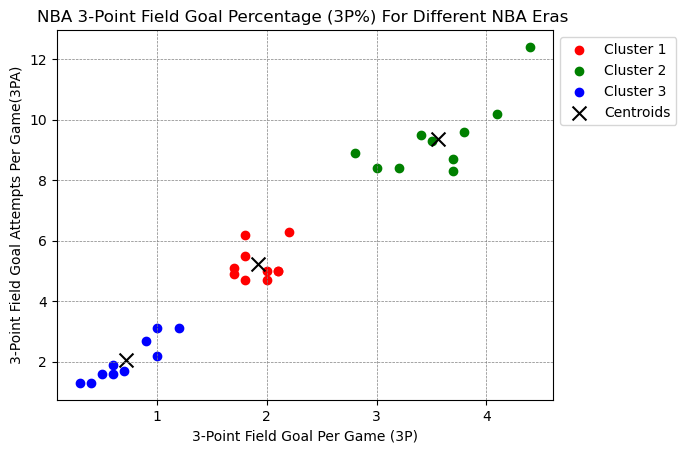

In [15]:
label0 = three_point_clustering[label == 0]
label1 = three_point_clustering[label == 1]
label2 = three_point_clustering[label == 2]

plt.scatter(label0[:,0], label0[:,1], color = 'red', label = 'Cluster 1')
plt.scatter(label1[:,0], label1[:,1], color = 'green', label = 'Cluster 2')
plt.scatter(label2[:,0], label2[:,1], color = 'blue', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color = 'black', marker = 'x', s = 100, label = 'Centroids')

plt.xlabel('3-Point Field Goal Per Game (3P)')
plt.ylabel('3-Point Field Goal Attempts Per Game(3PA)')
plt.title('NBA 3-Point Field Goal Percentage (3P%) For Different NBA Eras ')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

> ## <b> C. Simple Dataset  <a name="part23"></a>

### <u><b> Step 0: Initialization:</b></u>

The Centroid 1 will take the values (1, 2), Centroid 2 (3, 4), Centroid 3 (5, 6) and Centroid 4 (7, 8)

### <u><b> Step 1 and 2:</b></u>
| Data | Centroid 1 (1, 2) | Centroid 2 (3, 4) | Centroid 3 (5, 6) | Centroid 4 (9, 4)| Best Cluster |
| :--- | :--- | :--- | :--- | :--- | :--- |
|[1, 2]|0.0|2.8|5.7|8.2|1|
|[2, 2]|1.0|2.2|5.0|7.3|1|
|[1, 3]|1.0|2.2|5.0|8.1|1|
|[8, 2]|7.0|5.4|5.0|2.2|3|
|[9, 3]|8.1|6.1|5.0|1.0|3|
|[8, 3]|7.1|5.1|4.2|1.4|3|
|[1, 7]|5.0|3.6|4.1|8.5|2|
|[1, 9]|7.0|5.4|5.0|9.4|3|
|[2, 8]|6.1|4.1|3.6|8.1|3|
|[3, 9]|7.3|5.0|3.6|7.8|3|
|[4, 4]|3.6|1.0|2.2|5.0|2|
|[5, 5]|5.0|2.2|1.0|4.1|3|

### <u><b> Step 3:</b></u>

Cluster Centroid $K_1$ = ($\frac{1 + 2 + 1}{3}$, $\frac{2 + 2 + 3}{3}$) =
($\frac{4}{3}$, $\frac{7}{3}$)

Cluster Centroid $K_2$  = ($\frac{25}{3}$, $\frac{8}{3}$)

Cluster Centroid $K_3$  = (2.5, 5.5)

Cluster Centroid $K_4$  = (2.75, 7.75)

### <u><b>Iterative loop 1:

<u><b> Step 1 and 2:</b></u>
    
| Data | Centroid 1   | Centroid 2   | Centroid 3 | Centroid 4 | Best Cluster |
| :--- | :--- | :--- | :--- | :--- | :--- |
|[1, 2]|0.5|7.4|3.8|6.0|1|
|[2, 2]|0.7|6.4|3.5|5.8|1|
|[1, 3]|0.7|7.3|2.9|5.1|1|
|[8, 2]|6.7|0.7|6.5|7.8|2|
|[9, 3]|7.7|0.7|7.0|7.9|2|
|[8, 3]|6.7|0.5|6.0|7.1|2|
|[1, 7]|4.7|8.5|2.1|1.9|4|
|[1, 9]|6.7|9.7|3.8|2.2|4|
|[2, 8]|5.7|8.3|2.5|0.8|4|
|[3, 9]|6.9|8.3|3.5|1.3|4|
|[4, 4]|3.1|4.5|2.1|4.0|3|
|[5, 5]|4.5|4.1|2.5|3.6|3|

### <u><b>Iterative loop 1:

<u><b>Step 3:

Cluster Centroid $K_1$ = ($\frac{4}{3}$, $\frac{7}{3}$)

Cluster Centroid $K_2$  = ($\frac{25}{3}$, $\frac{8}{3}$)

Cluster Centroid $K_3$  = (4.5, 4.5)

Cluster Centroid $K_4$  = (1.75, 8.25)

### <u><b>Iterative loop 2:

<u><b> Step 1 and 2:</b></u>

| Data | Centroid 1   | Centroid 2   | Centroid 3 | Centroid 4 | Best Cluster |
| :--- | :--- | :--- | :--- | :--- | :--- |
|[1, 2]|0.5|7.4|4.3|6.3|1|
|[2, 2]|0.7|6.4|3.5|6.3|1|
|[1, 3]|0.7|7.3|3.8|5.3|1|
|[8, 2]|6.7|0.7|4.3|8.8|2|
|[9, 3]|7.7|0.7|4.7|9.0|2|
|[8, 3]|6.7|0.5|3.8|8.2|2|
|[1, 7]|4.7|8.5|4.3|1.5|4|
|[1, 9]|6.7|9.7|5.7|1.1|4|
|[2, 8]|5.7|8.3|4.3|0.4|4|
|[3, 9]|6.9|8.3|4.7|1.5|4|
|[4, 4]|3.1|4.5|0.7|4.8|3|
|[5, 5]|4.5|4.1|0.7|4.6|3|

### <u><b>Iterative loop 2:

<u><b>Step 3:

Cluster Centroid $K_1$ = ($\frac{4}{3}$, $\frac{7}{3}$)

Cluster Centroid $K_2$  = ($\frac{25}{3}$, $\frac{8}{3}$)

Cluster Centroid $K_3$  = (4.5, 4.5)

Cluster Centroid $K_4$  = (1.75, 8.25)
    
We obtain the same clusters as before after this further iteration. There is thus convergence and our hand-made algorithm is complete. Our centroid clusters take the following center values: ($\frac{4}{3}$, $\frac{7}{3}$), ($\frac{25}{3}$, $\frac{8}{3}$), (4.5, 4.5), (1.75, 8.25).

> ## D. Sanity Check and Visualisation  <a name="part24"></a>


In [16]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(values)
print("Centroid clusters take the following center values", kmeans.cluster_centers_)

Centroid clusters take the following center values [[1.33333333 2.33333333]
 [8.33333333 2.66666667]
 [1.75       8.25      ]
 [4.5        4.5       ]]


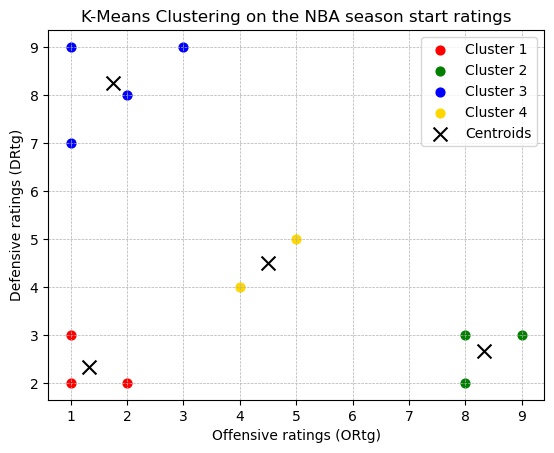

In [17]:
label0 = values[label == 0]
label1 = values[label == 1]
label2 = values[label == 2]
label3 = values[label == 3]


plt.scatter(label0[:,0], label0[:,1], color = 'red', s = 40, label = 'Cluster 1')
plt.scatter(label1[:,0], label1[:,1], color = 'green', s = 40, label = 'Cluster 2')
plt.scatter(label2[:,0], label2[:,1], color = 'blue', s = 40, label = 'Cluster 3')
plt.scatter(label3[:,0], label3[:,1], color = 'gold', s = 40, label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color = 'black', marker = 'x', s = 100, label = 'Centroids')


plt.xlabel('Values of x')
plt.ylabel('Values of y'')
plt.title('K-Means Clustering on the NBA season start ratings')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

> # Task 3: Create a test harness <a name="part3"></a>

A test harness is a set of test programs and data used by developers to perform unit tests on software models under development. The one that is presented below, allows to check if the final centroids obtained by my algorithm (task 4) correspond to those obtained by the library from sklearn.cluster.

In [18]:
def harness_test():
    rows = 2
    columns = 4
    
    
    myalgorithm = []
    for j in range(columns):
        for i in range(rows):
            mylist.append(centroids[i][j],)
    
    sklearnlibrary = []
    for l in range(rows):
        for k in range(columns):
            sklist.append(kmeans2.cluster_centers_.tolist()[k][l],)
            
    mylist = [round(num, 5) for num in mylist]
    sklist = [round(num, 5) for num in sklist]
            
    print('Our Algorithm Centroids coordinates values: '
          + str(sorted(myalgorithm)))
    print("Sklearn's Centoids coordinates values: "
          + str(sorted(sklearnlibrary)))
        
    if sorted(sklearnlibrary) == sorted(myalgorithm):
        print('Harness test is Successful')
    else:
        print('Harness test is Unsuccessful ')

> # Task 4: Implement k-means clustering in Python <a name="part4"></a>


In [19]:
start_time = time.time()

In [20]:
clusters_NBA=len(np.unique(y))

In [21]:
def euclidean_dis(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [22]:
class K_Means:
    
    def __init__(self,data,k,max_ite):
        self.data=data
        self.k=k
        self.max_ite=max_ite
        
    def predict(self):

        centroids = defaultdict(int)
        
        K=self.k
        max_iter=self.max_ite
        
        for i in range(K):
            centroids[i] = self.data[i]

        r=0

        for i in range(max_iter):
            r=r+1
            classes=defaultdict(list)
            
            for key in range(K):
                classes[key]=[]
            for datapoint in self.data:
                distance=[]
                for j in range(K):

                    dis=euclidean_dis(datapoint,centroids[j])

                    distance.append(dis)
                mindis=min(distance)

                index=distance.index(mindis)
                classes[index].append(datapoint)
                old_centroid=dict(centroids)

            for t in range(K):
                class_=classes[t]


                new_centroid=np.mean(class_,axis=0)
                centroids[t]=new_centroid
            flg=1
            for t in range(K):

                a=centroids[t]
                b=old_centroid[t]
                if np.sum((a - b)/b * 100) > 0.001:
                    flg = 0

            if flg==1:
                break

        return classes,centroids

In [23]:
kmeans=K_Means(three_point_clustering[:,:4],clusters_NBA,10000)

classes,centroids=kmeans.predict()


for i in range(0,3):
    classes[i]=np.array(classes[i]).tolist()
    
for i in range(0,3):
    print(len(classes[i]))
print(centroids)

10
10
10
defaultdict(<class 'int'>, {0: array([3.56, 9.37]), 1: array([1.92, 5.24]), 2: array([0.72, 2.05])})


## <center> <u> Iris Dataset

From the Iris dataset we can figure out 3 different classes:
>Iris-Setosa

>Iris-Versicolour

>Iris-Virginica

Thus, it is interesting to take 3 centroïds (K = 3)

In [24]:
iris_df = pd.DataFrame(iris.data, columns=['sepal length','sepal width','petal length','petal width'])
iris_df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
iris_KMC = iris_df[['sepal length', 'sepal width']].to_numpy()
iris_KMC

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [26]:
def MyKMeans(iris_KMC, k):
    
    # Step 1: Randomly create the centroids.
    
    initialcentroids = np.random.randint(100, size=(k, 2))
    
    # Repeat steps 2-4 until convergence.
    
    while True:
        
        # Step 2: Calculate the Euclidean distance of each iris_KMC point from the centroids generated above.
        
        EucDist = np.linalg.norm(iris_KMC - initialcentroids[0,:],axis=1).reshape(-1,1)
        
        for j in range(1, k):
            EucDist = np.append(EucDist, np.linalg.norm(iris_KMC
                                - initialcentroids[j,:],axis=1).reshape(-1,1),axis=1)
        
        # Step 3: Assign each iris_KMC point a cluster based on the Euclidean distance from the centroids.
        
        clusters = np.argmin(EucDist,axis=1)
        
        # Step 4: Calculate the new cluster centroids.
        
        centroids = np.array([iris_KMC[clusters == i].mean(0)
                                for i in range(k)])
        
        # Check for convergence.
        
        if np.all(initialcentroids == centroids):
            break
        initialcentroids = centroids
        
    print(centroids)
    return centroids.T, clusters, initialcentroids

In [ ]:
centroids, clusters, init = MyKMeans(iris_KMC, 4)

/tmp/ipykernel_161/457144704.py:25: RuntimeWarning: Mean of empty slice.
  centroids = np.array([iris_KMC[clusters == i].mean(0)
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [ ]:
df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df['target']=pd.Series(iris.target)
df['target_names']=pd.Series(iris.target_names)
species = []
for i in range(len(df)):
    if df.iloc[i]['target'] == 0:
        species.append('setosa')
    elif df.iloc[i]['target'] == 1:
        species.append('versicolor')
    elif df.iloc[i]['target'] == 2:
        species.append('virginica')
df['Species'] = species

y=pd.DataFrame(iris.target,columns=['Classes'])

In [ ]:
df

In [ ]:
x=iris.data
x

In [ ]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='rainbow') #try using cmap='rainbow'
# plt.scatter(x=df['petal length'], y=df['petal width'] ,c=iris.target, cmap='rainbow')
plt.show
# plt.xlabel('Sepal Width', fontsize=10)
# plt.ylabel('Sepal length', fontsize=10) 

In [ ]:
no_of_instances = len(df.index) # number of rows
no_of_columns = len(df.columns) # number of columns
no_of_attributes = no_of_columns - 2
actual_class_column = no_of_columns - 1

In [ ]:
unique_class_list_df = df.iloc[:,actual_class_column]
unique_class_list_np = unique_class_list_df.unique() #Numpy array
unique_class_list_df = unique_class_list_df.drop_duplicates()#Pandas df
 
# Record the number of unique classes in the data set
num_unique_classes = len(unique_class_list_df)
 
# Record the value for K, the number of clusters
K = num_unique_classes

K

In [ ]:
#Pour enlever les 2 colonnes target et species
qdf = df.iloc[:,[0,1,2,3]]
qdf

In [ ]:
# Remove the Instance and the Actual Class Column to create an unlabled
# data set
instance_id_colname = df.columns[0]
class_column_colname = df.columns[actual_class_column]
pd_data_set = df.drop(columns = [ # Each row is a different instance
        instance_id_colname, class_column_colname]) 

In [ ]:
# Convert dataframe into a Numpy array
np_data_set = qdf.to_numpy(copy=True)
# Randomly select k instances from the data set. 
# These will be the cluster centroids for the first iteration
# of the algorithm.
centroids = np_data_set[np.random.choice(np_data_set.shape[
    0], size=K, replace=False), :]
centroids

In [ ]:
actual_class_column